# <center>Individual Final Project</center>
Using Machine Learning Technique to Trade in the Stock Market

In [ ]:
# Calculating RSI, MACD and Bollinger Bands using the ta library.
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29103 sha256=22aaca495ef3bb742a7040f351eb98bb940e15b7e12631d14133f6de8f4b6ba7
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


# 1 Business Understanding

Abstract: In this project, I have developed a smart trading bot that leverages machine learning models to predict stock price trends and generate buy and sell signals for optimal trading decisions. The primary motivation behind this trading bot is to simplify the stock market trading process and help investors maximize their returns.

1. Problem Definition:
The challenge of predicting stock price movements has always been a complex task, primarily due to the volatile nature of financial markets. Our goal is to build a trading bot that can successfully navigate this complexity and assist investors in making more informed decisions.

2. Data Retrieval and Annotation:
I collected Tencent stock data from 2015-2020 to train and test the model, including opening price, highest price, lowest price, closing price and trading volume, to analyze and predict trends. Characteristics used in our models include Moving Average, Moving Average Return, Relative Strength Index (RSI), Moving Average Convergence Divergence (MACD) and Bollinger Bands. I defined "high" and "low" in terms of local(10-day) extrema and created labels for our dataset accordingly.

3. Machine Learning Models:
I have employed four machine learning models, namely Random Forest (RF), XGBoost (XGB), Decision Tree (DT), and Multilayer Perceptron (MLP). These models were chosen based on their potential to capture complex patterns in financial data and their adaptability to new information.

4. Model Training and Validation:
The dataset was split into training and testing sets. Each model was trained using the training set, and their performance was evaluated using the testing set. Key performance metrics such as accuracy and F1-score were used to assess the models' effectiveness in predicting "high" and "low" price movements.

5. Trading Mechanism:
Use 2021 Tencent stock data to simulate real trading. I simulated trading scenarios using trained models for different investor types: short-term, medium-term, long-term and random investors. The trading mechanism buys and sells stocks based on buy and sell signals generated using models. Investor preferences, such as their profit targets and risk tolerance, are expressed through adjustable parameters such as "g" (gain), "l" (loss) and "d" (days). Finally, compare the four model profits in the bar chart.

# 2 Data Acquisition and Processing

In [ ]:
#use pandas and yfinance library to get historical stock price data:
import pandas as pd
import yfinance as yf
from scipy.signal import argrelextrema
import numpy as np
import matplotlib.pyplot as plt

ticker = '0700.HK'
start_date = '2015-01-01'
end_date = '2021-01-01'

# Get stock price data
stock_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


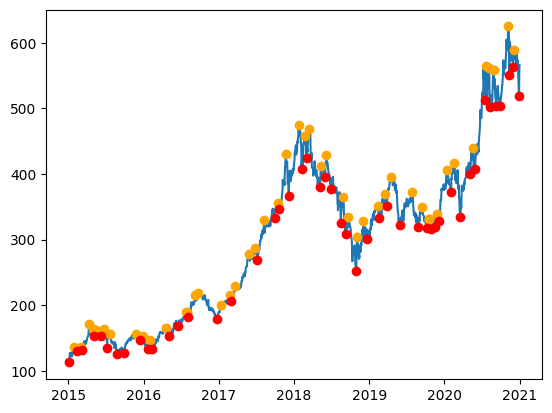

In [ ]:
# Calculate local maxima and minima
n = 10
local_max = argrelextrema(stock_data.Close.values, np.greater_equal, order=n)
local_min = argrelextrema(stock_data.Close.values, np.less_equal, order=n)

# Plot stock price trends and local extrema
plt.plot(stock_data['Close'])
plt.plot(stock_data.iloc[local_max]['Close'], 'o', color='orange')
plt.plot(stock_data.iloc[local_min]['Close'], 'o', color='red')
plt.show()

# 3 Feature Selection

moving_avg: A moving average is a popular technical analysis tool used to smooth out price fluctuations and determine price trends. Moving averages help identify up and down trends in a market by calculating the average price over a period of time.

moving_avg_return: The moving average return represents the moving average of stock returns over a certain time range. This helps assess the stock's earnings performance and identify potential investment opportunities.

RSI (Relative Strength Index): RSI is a momentum indicator used to assess the speed at which the price of a stock or other financial asset is changing.

MACD (Moving Average Convergence/Divergence Index): MACD is a trend-following momentum indicator that measures price momentum by comparing moving averages over different time spans.

MACD_signal: The MACD signal line is a smoothing process of the original MACD line, usually obtained by calculating the moving average of the MACD line. When the MACD line crosses the signal line, it can be a signal to buy or sell.

BB_upper, BB_middle, BB_lower (Bollinger Bands): When the price is close to the upper or lower limit of the Bollinger Bands, it may indicate that the market is overbought or oversold, and a price reversal may occur.

These characteristics are widely adopted in technical analysis, so it is reasonable to use them as features when building machine learning models.

In [ ]:
def create_features(data, window=10):
    data['moving_avg'] = data['Close'].rolling(window=window).mean()
    data['moving_avg_return'] = (data['moving_avg'].pct_change() + 1).cumprod()
    return data

stock_data = create_features(stock_data)

In [ ]:
import pandas as pd
import ta

# Calculate RSI
stock_data['RSI'] = ta.momentum.RSIIndicator(stock_data['Close']).rsi()

# Calculation of MACD and its signal line
macd_indicator = ta.trend.MACD(stock_data['Close'])
stock_data['MACD'] = macd_indicator.macd()
stock_data['MACD_signal'] = macd_indicator.macd_signal()

# Calculate Bollinger Bands
bollinger_indicator = ta.volatility.BollingerBands(stock_data['Close'])
stock_data['BB_upper'] = bollinger_indicator.bollinger_hband()
stock_data['BB_middle'] = bollinger_indicator.bollinger_mavg()
stock_data['BB_lower'] = bollinger_indicator.bollinger_lband()

In [ ]:
local_minima_indices = argrelextrema(stock_data.Close.values, np.less_equal, order=n)
local_maxima_indices = argrelextrema(stock_data.Close.values, np.greater_equal, order=n)


In [ ]:
stock_data['label'] = np.zeros(len(stock_data))
for i in local_minima_indices:
  stock_data['label'][i] = 1
for i in local_maxima_indices:
  stock_data['label'][i] = 2  
stock_data

<ipython-input-7-d02629a8df72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['label'][i] = 1
<ipython-input-7-d02629a8df72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['label'][i] = 2


,Open,High,Low,Close,Adj Close,Volume,moving_avg,moving_avg_return,RSI,MACD,MACD_signal,BB_upper,BB_middle,BB_lower,label
Date,,,,,,,,,,,,,,,
2015-01-02,113.599998,113.599998,111.300003,112.800003,110.276047,10862542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2015-01-05,113.500000,115.300003,112.800003,113.500000,110.960373,21808993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2015-01-06,114.000000,120.500000,113.599998,120.000000,117.314926,43678255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2015-01-07,123.500000,124.500000,122.599998,124.400002,121.616478,40863410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2015-01-08,127.500000,127.800003,125.599998,127.300003,124.451599,35638986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,557.500000,557.500000,557.500000,557.500000,553.381592,0,572.65,4.644363,41.917499,-3.119914,-1.174833,594.689290,576.575,558.460710,0.0
2020-12-28,539.500000,542.000000,519.000000,519.000000,515.166016,60559725,565.75,4.588402,31.366537,-7.186281,-2.377122,604.065186,573.375,542.684814,1.0
2020-12-29,530.000000,539.000000,526.000000,530.500000,526.581116,36250049,561.70,4.555556,36.507461,-9.372906,-3.776279,607.491433,571.750,536.008567,0.0


# 4 Modelling and evaluation

## 4.1 Random Forest

### Model Preparation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# prepare data
stock_data = stock_data.dropna()
X = stock_data[['moving_avg', 'moving_avg_return', 'RSI', 'MACD', 'MACD_signal', 'BB_upper', 'BB_middle', 'BB_lower']].values
y = stock_data['label'].values

# Divide training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

### Training Model

In [47]:
#rf = RandomForestClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=10)
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

### Evaluation Model

In [44]:
y_pred = rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9517241379310345
F1 Score: 0.9304252467405871


### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:  {'max_depth': None}


In [ ]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
print("Accuracy with the best parameters: ", accuracy)
print("F1 Score with the best parameters:", f1)

Accuracy with the best parameters:  0.9540229885057471
F1 Score with the best parameters: 0.9357917402484741


## 4.2 XGBoost

### Model Preparation

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# prepare data
stock_data = stock_data.dropna()
X = stock_data[['moving_avg', 'moving_avg_return', 'RSI', 'MACD', 'MACD_signal', 'BB_upper', 'BB_middle', 'BB_lower']].values

y = stock_data['label'].values

# Divide training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Training Model

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(max_depth=3)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### Evaluation Model

In [ ]:
y_pred = xgb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9333333333333333
F1 Score: 0.9243677856476344


### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb=XGBClassifier()
param_grid = {
    'max_depth': [3, 4, 5],
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'max_depth': 3}


In [ ]:
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='macro')
print("Accuracy with the best parameters: ", accuracy)
print("F1 Score with the best parameters:", f1)

Accuracy with the best parameters:  0.9425287356321839
F1 Score with the best parameters: 0.36511466982997237


## 4.3 DecisionTree

### Model Preparation

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# prepare data
stock_data = stock_data.dropna()
X = stock_data[['moving_avg', 'moving_avg_return', 'RSI', 'MACD', 'MACD_signal', 'BB_upper', 'BB_middle', 'BB_lower']].values
y = stock_data['label'].values

# Divide training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

### Training Model

In [ ]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Evaluation Model

In [ ]:
y_pred = dt.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7793103448275862
F1 Score: 0.785620970277681


## 4.4 Neural Networks -- MLP 

### Model Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# prepare data
stock_data = stock_data.dropna()

X = stock_data[['moving_avg', 'moving_avg_return', 'RSI', 'MACD', 'MACD_signal', 'BB_upper', 'BB_middle', 'BB_lower']].values
y = stock_data['label'].values

# Divide training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

### Training Model

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

### Evaluation Model

In [ ]:
y_pred = mlp.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.23908045977011494
F1 Score: 0.3447815259021855


# 5 Real Business Performance Delivery

This part is to simulate real stock trading to compare the returns of the four models. Since short selling is prohibited, the program is set to buy 100 shares for the first time, and the subsequent trading process is set to buy or sell 99 shares of stock each time. The simulation results of each model include the investment income of each type of investor in Tencent stocks in 2021.

## 5.1 Define the Transaction Process Function

In [ ]:
def trading_simulation(stock_data, model, buy_threshold, sell_threshold, g, l, d):
    shares = 0
    bought_price = 0
    profit = 0
    for i in range(len(stock_data)):
        features = stock_data[['moving_avg', 'moving_avg_return', 'RSI', 'MACD', 'MACD_signal', 'BB_upper', 'BB_middle', 'BB_lower']].iloc[i].values.reshape(1, -1)
        prediction = model.predict(features)
        
        if prediction == buy_threshold and shares == 0:
            bought_price = stock_data['Close'].iloc[i]
            shares += 100
        elif prediction == buy_threshold and shares == 1:
            bought_price = stock_data['Close'].iloc[i]
            shares += 99
        elif prediction == sell_threshold and shares > 1:
            profit += (stock_data['Close'].iloc[i] - bought_price) * (shares-1)
            shares = 1
        elif i - d > 0 and shares > 1:
            profit += (stock_data['Close'].iloc[i] - bought_price) * (shares-1)
            shares = 1
            
    return profit

## 5.2 Set Parameters for Different Investor Types

In [ ]:
# Define short-term, medium-term, and long-term consumers
short_term_params = {'g': 0.03, 'l': 0.02, 'd': 5}
medium_term_params = {'g': 0.05, 'l': 0.03, 'd': 10}
long_term_params = {'g': 0.10, 'l': 0.06, 'd': 20}

buy_threshold = 1
sell_threshold = 2

# Define Random Investor
import random

def random_trader(stock_data, model, buy_threshold, sell_threshold):
    g = random.uniform(0.01, 0.1)
    l = random.uniform(0.01, 0.1)
    d = random.randint(1, 30)

    return trading_simulation(stock_data, model, buy_threshold, sell_threshold, g, l, d)

## 5.3 Get 2021 Tencent Stock Data

In [ ]:
# Get Stock Data for 2021
start_date = '2021-01-01'
end_date = '2021-12-31'
stock_data_2021 = yf.download('0700.HK', start=start_date, end=end_date)
stock_data_2021

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,558.000000,583.000000,557.500000,572.500000,568.270813,20784101
2021-01-05,572.000000,586.500000,565.500000,583.500000,579.189575,18668061
2021-01-06,585.000000,599.000000,585.000000,596.500000,592.093506,25712527
2021-01-07,580.500000,584.500000,568.500000,568.500000,564.300415,39877643
2021-01-08,568.500000,578.000000,567.500000,573.000000,568.767151,22863792
...,...,...,...,...,...,...
2021-12-23,454.000000,468.799988,449.200012,461.799988,459.638245,32952274
2021-12-24,460.799988,460.799988,460.799988,460.799988,458.642944,0
2021-12-28,457.799988,459.200012,445.000000,450.399994,448.291626,18949609


In [ ]:
# Calculating moving averages and moving average returns for 2021
stock_data_2021['moving_avg'] = stock_data_2021['Close'].rolling(window=10).mean()
stock_data_2021['moving_avg_return'] = (stock_data_2021['Close'] / stock_data_2021['moving_avg']) - 1
import pandas as pd
import ta

# Calculate RSI
stock_data_2021['RSI'] = ta.momentum.RSIIndicator(stock_data_2021['Close']).rsi()

# Calculation of MACD and its signal line
macd_indicator = ta.trend.MACD(stock_data_2021['Close'])
stock_data_2021['MACD'] = macd_indicator.macd()
stock_data_2021['MACD_signal'] = macd_indicator.macd_signal()

# Calculate Bollinger Bands
bollinger_indicator = ta.volatility.BollingerBands(stock_data_2021['Close'])
stock_data_2021['BB_upper'] = bollinger_indicator.bollinger_hband()
stock_data_2021['BB_middle'] = bollinger_indicator.bollinger_mavg()
stock_data_2021['BB_lower'] = bollinger_indicator.bollinger_lband()
stock_data_2021 = stock_data_2021.dropna()

In [ ]:
stock_data_2021

,Open,High,Low,Close,Adj Close,Volume,moving_avg,moving_avg_return,RSI,MACD,MACD_signal,BB_upper,BB_middle,BB_lower
Date,,,,,,,,,,,,,,
2021-02-22,749.500000,749.500000,711.000000,713.500000,708.229248,27296535,743.250000,-0.040027,52.500113,26.551069,32.461511,778.994466,729.025000,679.055534
2021-02-23,697.000000,722.000000,697.000000,707.000000,701.777222,26933971,740.650000,-0.045433,50.511984,22.451905,30.459590,777.806533,729.825000,681.843467
2021-02-24,709.500000,715.500000,680.000000,687.000000,681.924988,41585608,735.700000,-0.066195,44.880262,17.389005,27.845473,774.190563,725.850000,677.509437
2021-02-25,700.000000,717.000000,691.500000,691.500000,686.391724,24008360,730.800000,-0.053777,46.330182,13.583154,24.993009,775.044040,724.500000,673.955960
2021-02-26,669.000000,686.500000,662.500000,662.500000,657.605957,37077103,720.950000,-0.081074,39.177850,8.133178,21.621043,779.140547,722.550000,665.959453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,454.000000,468.799988,449.200012,461.799988,459.638245,32952274,451.179996,0.023538,50.203065,-8.224775,-7.691376,480.987269,457.659996,434.332723
2021-12-24,460.799988,460.799988,460.799988,460.799988,458.642944,0,450.919995,0.021911,49.743554,-6.968748,-7.546850,480.756629,457.529996,434.303363
2021-12-28,457.799988,459.200012,445.000000,450.399994,448.291626,18949609,449.299994,0.002448,45.118299,-6.734894,-7.384459,480.242235,456.929996,433.617757


## 5.4 Calculate Profits

### Use Random Forest Model

In [ ]:
# Calculate profits for various types of investors using 2021 data

model = rf
short_term_profit_2021_rf = trading_simulation(stock_data_2021, model, buy_threshold, sell_threshold, **short_term_params)
medium_term_profit_2021_rf = trading_simulation(stock_data_2021, model, buy_threshold, sell_threshold, **medium_term_params)
long_term_profit_2021_rf = trading_simulation(stock_data_2021, model, buy_threshold, sell_threshold, **long_term_params)
random_trader_profit_2021_rf = random_trader(stock_data_2021, model, buy_threshold, sell_threshold)

print("Short-term investor profits in 2021:", short_term_profit_2021_rf)
print("Medium-term investor profits in 2021:", medium_term_profit_2021_rf)
print("Long-term investor profits in 2021:", long_term_profit_2021_rf)
print("Random investor profits in 2021:", random_trader_profit_2021_rf)

Short-term investor profits in 2021: 7692.295166015625
Medium-term investor profits in 2021: 2346.295166015625
Long-term investor profits in 2021: 3138.295166015625
Random investor profits in 2021: 2593.795166015625


### Use XGBoost Model

In [ ]:
# Calculate profits for various types of investors using 2021 data

model = xgb
short_term_profit_2021_xgb = trading_simulation(stock_data_2021, model, buy_threshold, sell_threshold, **short_term_params)
medium_term_profit_2021_xgb = trading_simulation(stock_data_2021, model, buy_threshold, sell_threshold, **medium_term_params)
long_term_profit_2021_xgb = trading_simulation(stock_data_2021, model, buy_threshold, sell_threshold, **long_term_params)
random_trader_profit_2021_xgb = random_trader(stock_data_2021, model, buy_threshold, sell_threshold)

print("Short-term investor profits in 2021:", short_term_profit_2021_xgb)
print("Medium-term investor profits in 2021:", medium_term_profit_2021_xgb)
print("Long-term investor profits in 2021:", long_term_profit_2021_xgb)
print("Random investor profits in 2021:", random_trader_profit_2021_xgb)

Short-term investor profits in 2021: -3554.1024169921875
Medium-term investor profits in 2021: -9048.602416992188
Long-term investor profits in 2021: -10583.102416992188
Random investor profits in 2021: -3653.1024169921875


### Use Decision Tree Model

In [ ]:
# Calculate profits for various types of investors using 2021 data

model = dt
short_term_profit_2021_dt = trading_simulation(stock_data_2021, model, buy_threshold, sell_threshold, **short_term_params)
medium_term_profit_2021_dt = trading_simulation(stock_data_2021, model, buy_threshold, sell_threshold, **medium_term_params)
long_term_profit_2021_dt = trading_simulation(stock_data_2021, model, buy_threshold, sell_threshold, **long_term_params)
random_trader_profit_2021_dt = random_trader(stock_data_2021, model, buy_threshold, sell_threshold)

print("Short-term investor profits in 2021:", short_term_profit_2021_dt)
print("Medium-term investor profits in 2021:", medium_term_profit_2021_dt)
print("Long-term investor profits in 2021:", long_term_profit_2021_dt)
print("Random investor profits in 2021:", random_trader_profit_2021_dt)

Short-term investor profits in 2021: 4732.198791503906
Medium-term investor profits in 2021: -7692.301208496094
Long-term investor profits in 2021: -6850.801208496094
Random investor profits in 2021: -1851.3012084960938


### Use MLP Model

In [ ]:
# Calculate profits for various types of investors using 2021 data

model = mlp
short_term_profit_2021_mlp = trading_simulation(stock_data_2021, model, buy_threshold, sell_threshold, **short_term_params)
medium_term_profit_2021_mlp = trading_simulation(stock_data_2021, model, buy_threshold, sell_threshold, **medium_term_params)
long_term_profit_2021_mlp = trading_simulation(stock_data_2021, model, buy_threshold, sell_threshold, **long_term_params)
random_trader_profit_2021_mlp = random_trader(stock_data_2021, model, buy_threshold, sell_threshold)

print("Short-term investor profits in 2021:", short_term_profit_2021_mlp)
print("Medium-term investor profits in 2021:", medium_term_profit_2021_mlp)
print("Long-term investor profits in 2021:", long_term_profit_2021_mlp)
print("Random investor profits in 2021:", random_trader_profit_2021_mlp)

Short-term investor profits in 2021: 4692.599395751953
Medium-term investor profits in 2021: 4692.599395751953
Long-term investor profits in 2021: 4692.599395751953
Random investor profits in 2021: 4692.599395751953


# 6 Model Profits Comparison Visualization

This part is the return performance of four investors in four models in a bar chart

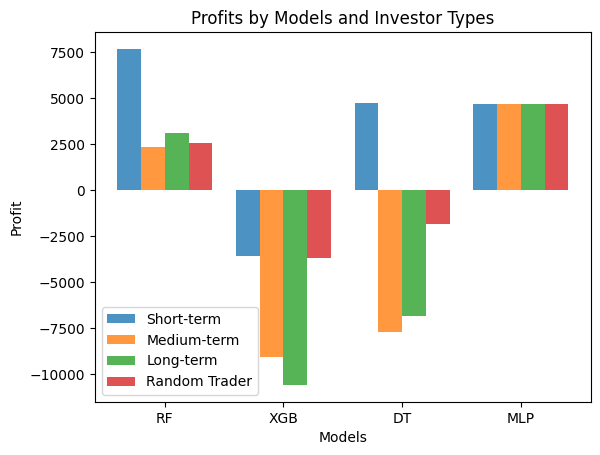

In [50]:
import matplotlib.pyplot as plt
import numpy as np

profits = [
    [short_term_profit_2021_rf, short_term_profit_2021_xgb, short_term_profit_2021_dt, short_term_profit_2021_mlp],
    [medium_term_profit_2021_rf, medium_term_profit_2021_xgb, medium_term_profit_2021_dt, medium_term_profit_2021_mlp],
    [long_term_profit_2021_rf, long_term_profit_2021_xgb, long_term_profit_2021_dt, long_term_profit_2021_mlp],
    [random_trader_profit_2021_rf, random_trader_profit_2021_xgb, random_trader_profit_2021_dt, random_trader_profit_2021_mlp],
]

bar_width = 0.2
opacity = 0.8
x_labels = ['RF', 'XGB', 'DT', 'MLP']

fig, ax = plt.subplots()
index = np.arange(len(x_labels))

for i, investor_type in enumerate(['Short-term', 'Medium-term', 'Long-term', 'Random Trader']):
    ax.bar(index + i * bar_width, profits[i], bar_width, alpha=opacity, label=investor_type)

ax.set_xlabel('Models')
ax.set_ylabel('Profit')
ax.set_title('Profits by Models and Investor Types')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(x_labels)
ax.legend()

plt.show()


In [52]:
profits = [[int(num) for num in inner_list] for inner_list in profits]
profits

[[7692, -3554, 4732, 4692],
 [2346, -9048, -7692, 4692],
 [3138, -10583, -6850, 4692],
 [2593, -3653, -1851, 4692]]

# 7 Summary

This project uses random forest, xgboost, decision tree, and MLP models to realize the stock trading robot system. Combined with the model evaluation and the situation based on the simulated real trading of Tencent stocks in 2021, the accuracy rate of the MLP model is 0.34 and the income obtained is 4962, but this result is not credible, indicating that the MLP model is completely invalid. The best performing model is the random forest model, with an accuracy rate of 0.95. Among the 'Short-term', 'Medium-term', 'Long-term' and 'Random Trader' investors, the returns are the highest among the four models:
*   'Short-term' profits: 7692
*   'Medium-term' profits: 2346
*   'Long-term' profits: 3138
*   'Random' profits: 2593

This is enough to show that random forest is the best choice in the stock trading robot system.